In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import csv
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model
from keras.layers import Rescaling
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_dir = 'C:/Users/Somn117/Documents/Blender-Auto-render-main/results/cnn1/train/mixed/'
train_label_file = 'C:/Users/Somn117/Documents/Blender-Auto-render-main/results/cnn1/train/mixed_csv/coor_.csv'
train_coordi_dict = {}
class_names = ['Type 1', 'Type 2', 'Type 3']
# array=[1,2,3]
# normalized_arr = preprocessing.normalize([array])
# print(normalized_arr)

with open(train_label_file) as f:
    lines = f.read().splitlines()
for line in lines:
    elements = line.split(',')
    train_coordi_dict[elements[0]] = int(elements[1])

print(elements[0])
test_dir = 'C:/Users/Somn117/Documents/Blender-Auto-render-main/results/cnn/test/mixed/'
test_label_file = 'C:/Users/Somn117/Documents/Blender-Auto-render-main/results/cnn/test/mixed_csv/coor_.csv'
test_coordi_dict ={}
with open(test_label_file) as f:
    lines = f.read().splitlines()
for line in lines:
    elements=line.split(',')
    test_coordi_dict[elements[0]] = elements[1]

train_sample = len(os.listdir(train_dir))
test_sample = len(os.listdir(test_dir))
print("Train Set samples: " + str(train_sample))
print("Test Set samples: " + str(test_sample))

# preprocessing.normalize(test_coordi_dict)
print(train_coordi_dict['800.png'])

899.png
Train Set samples: 900
Test Set samples: 60
3


In [3]:

    train_x_data_set = np.zeros([train_sample,100,100,4])
    train_y_data_set = np.zeros([train_sample,1])
    


In [4]:
for index,filename in enumerate(os.listdir(train_dir)):
    
        img = Image.open(train_dir + filename)
        img = img.resize((100,100), Image.ANTIALIAS)
        im = np.array(img)
        train_x_data_set[index,:,:,:] = im
        train_y_data_set[index,:] = train_coordi_dict[filename]


In [5]:
# print(train_y_data_set)

In [6]:
train_x_data_set = train_x_data_set/255
train_y_data_set = train_y_data_set/3

In [91]:
model = Sequential()


model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))

# model.add(Dense(units=64,activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(units=3,activation='relu'))

In [92]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=["accuracy"])

In [ ]:
model.fit(train_x_data_set,train_y_data_set,epochs=40)

Epoch 1/40
18/29 [=================>............] - ETA: 2s - loss: 0.3642 - accuracy: 0.0972

In [ ]:
test_x_data_set = np.zeros([test_sample,100,100,4])
test_y_data_set = np.zeros([test_sample,1])
for index,filename in enumerate(os.listdir(test_dir)):

    img = Image.open(test_dir + filename)
    img = img.resize((100,100),Image.ANTIALIAS)
    im = np.array(img)
    test_x_data_set[index,:,:,:] = im
    test_y_data_set[index,:] = test_coordi_dict[filename]

test_x_data_set = test_x_data_set/255

In [168]:
model.evaluate(test_x_data_set,test_y_data_set)
model.save('C:/Users/Somn117/Documents/Blender-Auto-render-main/results/nn_models/class_model1.pb')

2/2 [==============================] - 0s 59ms/step - loss: 0.3372
INFO:tensorflow:Assets written to: C:/Users/Somn117/Documents/Blender-Auto-render-main/results/nn_models/model1.pb\assets


In [169]:

model=load_model('C:/Users/Somn117/Documents/Blender-Auto-render-main/results/nn_models/model1.pb')
predictions=model.predict(test_x_data_set)
j=0
with open('C:/Users/Somn117/Documents/Blender-Auto-render-main/results/predictions.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    for j in predictions:
    # write a row to the csv file
        writer.writerow(j)
        
# result=test_coordi_dict[i]-predictions[i]
# with open('C:/Users/Somn117/Documents/Blender-Auto-render-main/results/result.csv', 'r') as fl:
#  # create the csv writer
#     writer = csv.writer(fl)
#     for j in result:
#     # write a row to the csv file
#         writer.writerow(j)     
        
predictions

array([[0.99969697, 0.4710517 , 0.6357662 , 0.64287674, 0.35456365],
       [0.9984279 , 0.5277189 , 0.7788217 , 0.7469897 , 0.42986745],
       [0.99977696, 0.52795225, 0.87844586, 0.7657439 , 0.44791055],
       [0.99939287, 0.5163665 , 0.5789077 , 0.74314815, 0.22261935],
       [0.99980205, 0.48416832, 0.6453795 , 0.6840582 , 0.34952903],
       [0.9997486 , 0.37213352, 0.8666531 , 0.5486613 , 0.46443707],
       [0.99924904, 0.32746047, 0.54603666, 0.5007547 , 0.18718058],
       [0.99942815, 0.49710286, 0.6242584 , 0.7113278 , 0.32403213],
       [0.9985387 , 0.5065486 , 0.5962527 , 0.7209075 , 0.28414652],
       [0.999002  , 0.4066999 , 0.8059218 , 0.55411136, 0.44921058],
       [0.9997156 , 0.24060893, 0.57621557, 0.4658192 , 0.18747255],
       [0.9994812 , 0.44112343, 0.60336924, 0.58788073, 0.34176946],
       [0.99818015, 0.5087332 , 0.7962445 , 0.67660236, 0.45719108],
       [0.9999968 , 0.22931117, 0.90684414, 0.5228377 , 0.39778173],
       [0.999871  , 0.2445589 , 0.

In [170]:
test_x_data_set[7].shape
import tensorflow as tf
print(tf.__version__)

2.6.2


[0.99969697 0.4710517  0.6357662  0.64287674 0.35456365]
result_class =  199.93939399719238


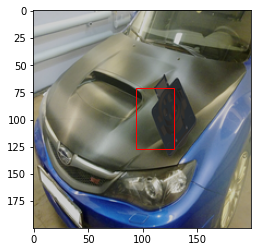

[0.9984279  0.5277189  0.7788217  0.7469897  0.42986745]
result_class =  199.68558549880981


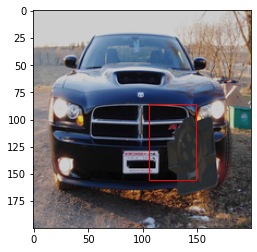

[0.99977696 0.52795225 0.87844586 0.7657439  0.44791055]
result_class =  199.9553918838501


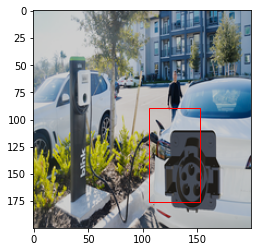

[0.99939287 0.5163665  0.5789077  0.74314815 0.22261935]
result_class =  199.87857341766357


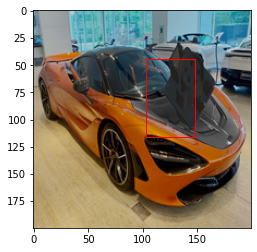

[0.99980205 0.48416832 0.6453795  0.6840582  0.34952903]
result_class =  199.96041059494019


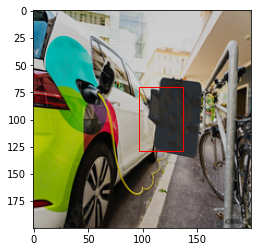

[0.9997486  0.37213352 0.8666531  0.5486613  0.46443707]
result_class =  199.94971752166748


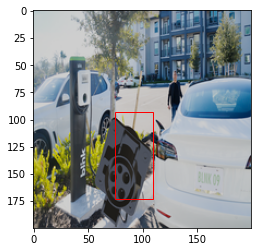

[0.99924904 0.32746047 0.54603666 0.5007547  0.18718058]
result_class =  199.84980821609497


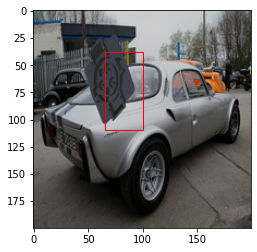

[0.99942815 0.49710286 0.6242584  0.7113278  0.32403213]
result_class =  199.88563060760498


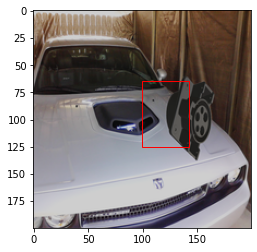

[0.9985387  0.5065486  0.5962527  0.7209075  0.28414652]
result_class =  199.70773458480835


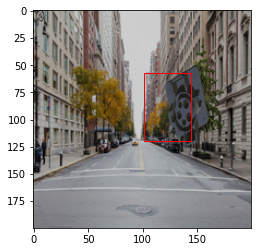

[0.999002   0.4066999  0.8059218  0.55411136 0.44921058]
result_class =  199.80039596557617


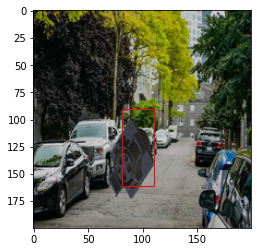

[0.9997156  0.24060893 0.57621557 0.4658192  0.18747255]
result_class =  199.94312524795532


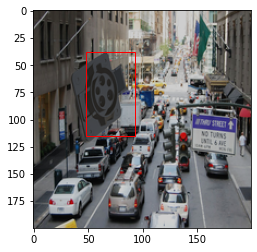

[0.9994812  0.44112343 0.60336924 0.58788073 0.34176946]
result_class =  199.896240234375


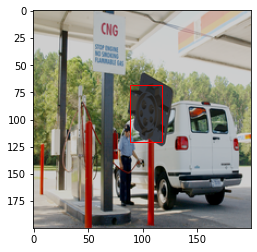

[0.99818015 0.5087332  0.7962445  0.67660236 0.45719108]
result_class =  199.63603019714355


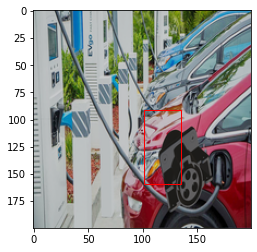

[0.9999968  0.22931117 0.90684414 0.5228377  0.39778173]
result_class =  199.99935626983643


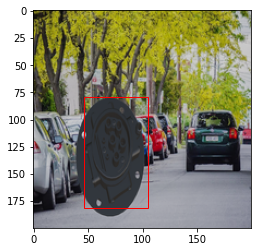

[0.999871   0.2445589  0.5189177  0.47962528 0.07288858]
result_class =  199.9742031097412


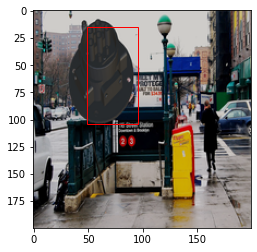

[0.99999213 0.46514696 0.5374389  0.75810474 0.02564612]
result_class =  199.99842643737793


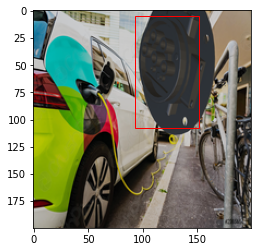

[0.9999901  0.43302298 0.6690692  0.62806535 0.307107  ]
result_class =  199.99802112579346


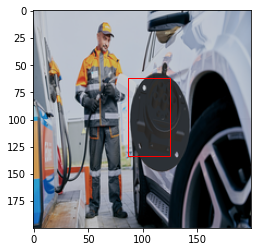

[0.99998903 0.5010233  0.9082459  0.73159677 0.45306438]
result_class =  199.99780654907227


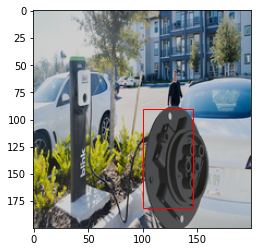

[0.9999994  0.46727753 0.60982627 0.75390077 0.09610265]
result_class =  199.99988079071045


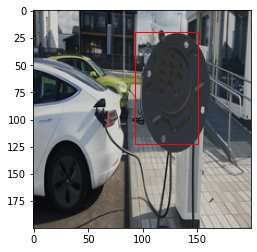

[0.99999946 0.4494025  0.8795748  0.69534296 0.40380368]
result_class =  199.9998927116394


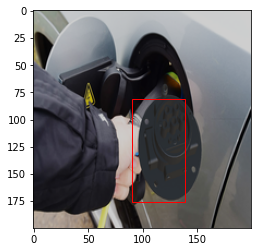

[0.9999393  0.19992733 0.6628092  0.4689458  0.28670645]
result_class =  199.98786449432373


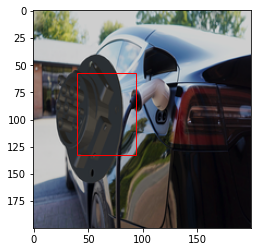

[0.9998754  0.1620358  0.5627662  0.43940744 0.07913435]
result_class =  199.9750852584839


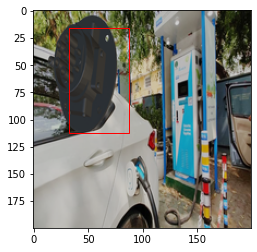

In [175]:
for i in range(22):
    print(predictions[i])
    hight = predictions[i][3]-predictions[i][1]
    width = predictions[i][4]-predictions[i][2]
    test_img = Image.fromarray(np.uint8(test_x_data_set[i]*255))
    fig,ax = plt.subplots(1)
    ax.imshow(test_img)
    result_class =  predictions[i][0] 
    print('result_class = ', result_class)
    rect = patches.Rectangle((predictions[i][1]*200,predictions[i][2]*200),hight*200,width*200,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.savefig('C:/Users/Somn117/Documents/Blender-Auto-render-main/results/cnn/results/frame%04d.jpg' % i)
    plt.show()
    

In [ ]:
model.save('C:/Users/Somn117/Documents/hand_dataset/test_arm/model/hand2108_3_10')